###과제1
- 데이터프레임을 만들고 주어진 메서드를 모두 사용하기

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame({'age' : [20, 20, 23, 48],
                   'height' : [183, 192, 175, 175],
                   'weight' : [77, 83, 83, 65]},
                  index = ['superman', 'antman', 'spiderman', 'betman'])
df

,age,height,weight
superman,20,183,77
antman,20,192,83
spiderman,23,175,83
betman,48,175,65


## 시리즈의 메서드
- append : 2개 이상의 시리즈 연결
- describe : 요약통계
- drop_duplicates : 중복값 없는 시리즈 반환
- equals : 시리즈에 해당 값 가진 요소 확인
- get_values : 시리즈 값 구하기 (values와 같음)
- isin
- min
- max
- mean
- std, var
- median
- replace : 특정값을 가진 시리즈 값을 교체
- sort_values : 정렬
- to_frame

In [6]:
age_df = df['age']
hei_df = df['height']
wei_df = df['weight'] # 각 컬럼들을 시리즈 형태로 추출하여 각각 다른 변수들에 저장

In [7]:
age_df.append([hei_df, wei_df]) # 시리즈를 순서대로 가로로 합치는 결과

<ipython-input-7-cb7c99605988>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_df.append([hei_df, wei_df]) # 시리즈를 순서대로 가로로 합치는 결과


superman      20
antman        20
spiderman     23
betman        48
superman     183
antman       192
spiderman    175
betman       175
superman      77
antman        83
spiderman     83
betman        65
dtype: int64

In [8]:
info_wei = wei_df.describe()
info_hei = hei_df.describe()
info_age = age_df.describe()
display(info_wei, info_hei, info_age) # 각 시리즈의 요약통계량을 각각의 변수에 저장하여 한번에 보여주기

count     4.000000
mean     77.000000
std       8.485281
min      65.000000
25%      74.000000
50%      80.000000
75%      83.000000
max      83.000000
Name: weight, dtype: float64

count      4.000000
mean     181.250000
std        8.098354
min      175.000000
25%      175.000000
50%      179.000000
75%      185.250000
max      192.000000
Name: height, dtype: float64

count     4.000000
mean     27.750000
std      13.573872
min      20.000000
25%      20.000000
50%      21.500000
75%      29.250000
max      48.000000
Name: age, dtype: float64

In [9]:
sr = pd.Series([20, 20, 30, 30, 34, 35, 40, 70, 80])

In [10]:
sr.drop_duplicates() # 중복되는 값 중 첫번째 등장하는 값을 index와 value 형태의 시리즈로 반환

0    20
2    30
4    34
5    35
6    40
7    70
8    80
dtype: int64

In [11]:
age_df.drop_duplicates() # 중복되는 값 중 첫번째 등장하는 값을 index와 value 형태의 시리즈로 반환

superman     20
spiderman    23
betman       48
Name: age, dtype: int64

In [12]:
df.drop_duplicates('age') # age 기준으로 중복값인 것을 제외한 데이터들의 데이터프레임으로 반환

,age,height,weight
superman,20,183,77
spiderman,23,175,83
betman,48,175,65


In [13]:
df.drop_duplicates('age', keep = 'last') # first : 첫번째로 발견된 중복데이터를 제외하고 나머지 중복된 데이터를 모두 삭제 , 기본값은 first
                                          # last : 마지막으로 발견된 중복데이터를 제외하고 나머지 중복된 데이터를 모두 삭제
                                          # False : 모든 중복 데이터를 삭제

,age,height,weight
antman,20,192,83
spiderman,23,175,83
betman,48,175,65


In [14]:
df.drop_duplicates('height', keep = False)

,age,height,weight
superman,20,183,77
antman,20,192,83


In [15]:
df.duplicated('age') # age 컬럼에 대한 각 데이터가 중복값인지 아닌지 논리형으로 결과값 반환

superman     False
antman        True
spiderman    False
betman       False
dtype: bool

In [16]:
df.duplicated('age', keep = False) # first : 첫번째로 발견된 중복데이터를 제외하고 나머지 중복된 데이터를 모두 True로 마킹, 기본값은 first
                                   # last : 마지막으로 발견된 중복데이터를 제외하고 나머지 중복된 데이터를 모두 True로 마킹
                                   # False : 모든 중복 데이터를 True로 마킹

superman      True
antman        True
spiderman    False
betman       False
dtype: bool

In [17]:
df.duplicated('height', keep = 'last')

superman     False
antman       False
spiderman     True
betman       False
dtype: bool

In [18]:
sr_age = pd.Series([20, 20, 23, 48], index = ['superman', 'antman', 'spiderman', 'betman'])
sr_age

superman     20
antman       20
spiderman    23
betman       48
dtype: int64

In [19]:
sr_age1 = pd.Series([20, 20, 23, 48])
sr_age1

0    20
1    20
2    23
3    48
dtype: int64

In [20]:
age_df.equals(sr_age) # age_df 시리즈와 sr_age 시리즈는 index와 value가 완전히 동일한 시리즈임

True

In [21]:
age_df.equals(sr_age1) # age_df 시리즈와 sr_age1 시리즈의 index가 다르므로 False를 반환

False

In [65]:
# 
hei_df.get_values() # pandas 버전 업데이트 필요

In [23]:
age_df.isin([20]) # 리스트 형태로 입력한 값이 시리즈 값 중에 존재하는 지 bool형으로 반환

superman      True
antman        True
spiderman    False
betman       False
Name: age, dtype: bool

In [24]:
hei_df.isin([183, 175])

superman      True
antman       False
spiderman     True
betman        True
Name: height, dtype: bool

In [25]:
hei_df.min() # 시리즈의 값 중 최솟값 반환

175

In [26]:
age_df.max() # 시리즈의 값 중 최댓값 반환

48

In [27]:
wei_df.mean() # 시리즈 값의 평균을 반환

77.0

In [28]:
wei_df.std() # 시리즈 값의 표준편차를 반환

8.48528137423857

In [29]:
wei_df.var() # 시리즈 값의 분산을 반환

72.0

In [30]:
age_df.median() # 시리즈 값의 중앙값을 반환

21.5

In [31]:
age_df.replace(20, 30) # 20인 값을 30으로 대체

superman     30
antman       30
spiderman    23
betman       48
Name: age, dtype: int64

In [32]:
age_df.replace({20:30, 48:24}) # dictionary 형태로 여러 값을 바꾸는 것 가능

superman     30
antman       30
spiderman    23
betman       24
Name: age, dtype: int64

In [33]:
age_df.replace(20, None) # None으로 바꾸는 것도 가능

superman     None
antman       None
spiderman      23
betman         48
Name: age, dtype: object

In [34]:
age_df.replace(20, 'twenty') # 문자열로 바꾸는 것 가능

superman     twenty
antman       twenty
spiderman        23
betman           48
Name: age, dtype: object

In [35]:
hei_df.sort_values() # 오름차순으로 정렬

spiderman    175
betman       175
superman     183
antman       192
Name: height, dtype: int64

In [36]:
hei_df.sort_values(ascending = False) # 내림차순으로 정렬

antman       192
superman     183
spiderman    175
betman       175
Name: height, dtype: int64

In [37]:
age_df.to_frame() # 시리즈 형태를 데이터프레임 형식으로 변환

,age
superman,20
antman,20
spiderman,23
betman,48


In [38]:
df_age = age_df.to_frame()
df_hei = hei_df.to_frame()
df_wei = wei_df.to_frame()

pd.concat([df_age, df_hei, df_wei], axis = 1) # 행을 기준으로 각 시리즈 별로 concat하여 원래의 데이터프레임과 같은 형태로 만들기

,age,height,weight
superman,20,183,77
antman,20,192,83
spiderman,23,175,83
betman,48,175,65


In [39]:
df_age = age_df.to_frame()
df_hei = hei_df.to_frame()
df_wei = wei_df.to_frame()

pd.concat([df_age, df_hei, df_wei], axis = 0) # 컬림을 기준으로 concat하면 결측치 발생

,age,height,weight
superman,20.0,NaN,NaN
antman,20.0,NaN,NaN
spiderman,23.0,NaN,NaN
betman,48.0,NaN,NaN
superman,NaN,183.0,NaN
antman,NaN,192.0,NaN
spiderman,NaN,175.0,NaN
betman,NaN,175.0,NaN
superman,NaN,NaN,77.0
antman,NaN,NaN,83.0


In [40]:
df_age = age_df.to_frame()
df_hei = hei_df.to_frame()
df_wei = wei_df.to_frame()

pd.concat([df_age, df_hei, df_wei], axis = 1, ignore_index = True) # 행을 기준으로 concat 하였을 때, ignore_index 매개변수를 사용하면 컬럼 이름을 인덱스로 받아들여 index를 초기화

,0,1,2
superman,20,183,77
antman,20,192,83
spiderman,23,175,83
betman,48,175,65


In [41]:
df_age = age_df.to_frame()
df_hei = hei_df.to_frame()
df_wei = wei_df.to_frame()

pd.concat([df_age, df_hei, df_wei], ignore_index = True) # 열을 기준으로 concat 하였을 때, ignore_index 매개변수를 사용하면 행 이름을 인덱스로 받아들여 index를 초기화
                                                         # reset_index 매서드를 사용한 결과와 같음

,age,height,weight
0,20.0,NaN,NaN
1,20.0,NaN,NaN
2,23.0,NaN,NaN
3,48.0,NaN,NaN
4,NaN,183.0,NaN
5,NaN,192.0,NaN
6,NaN,175.0,NaN
7,NaN,175.0,NaN
8,NaN,NaN,77.0
9,NaN,NaN,83.0


###과제2
- 구글링을 통해 축 전환에 대해 확인하고 코드로 작성하기

In [66]:
x = np.linspace(-3, 3, 100) # -3부터 3까지 100개의 숫자로 numpy 배열을 생성
y = 3**x+4

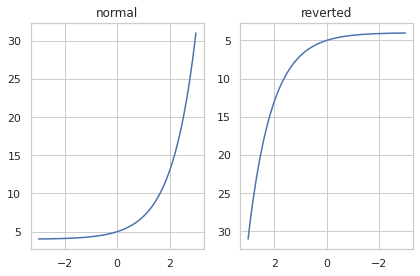

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2) # 한 화면에 plot을 2개 그리기

ax1.plot(x, y) # x와 y로 plot 생성
ax1.set_title('normal')

ax2.plot(x, y) # 2번째 plot도 x, y로 plot 생성
ax2.set_title('reverted')
ax2.invert_xaxis() # x축을 반전시키는 메서드
ax2.invert_yaxis() # y축을 반전시키는 메서드

fig.tight_layout() # 화면에 꽉차게 나오게 하는 메서드

### 과제3
- sns.set() 다양한 함수들을 찾아서 5개 이상 공유해 주세요!

In [42]:
import numpy as np

In [43]:
import matplotlib.pyplot as plt

In [44]:
def cosplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, n + 1):
        plt.plot(x, np.cos(x + i * .5) * (n + 2 - i) * flip)

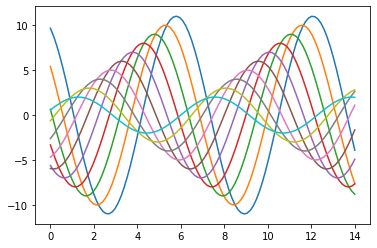

In [45]:
cosplot()

In [46]:
import seaborn as sns

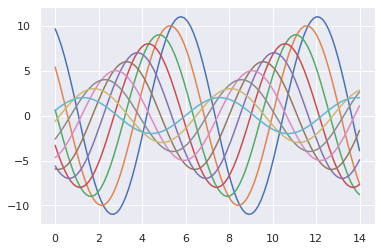

In [47]:
sns.set_theme() # seaborn theme 로 변경
cosplot()

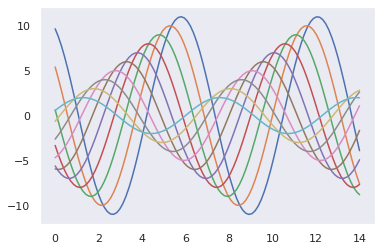

In [48]:
sns.set(style = 'dark')
cosplot()

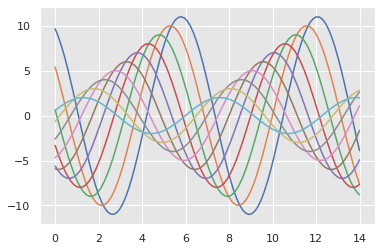

In [49]:
sns.set_style("darkgrid", {"axes.facecolor" : ".9"}) # axes.facecolor로 채도 조절 가능
cosplot()

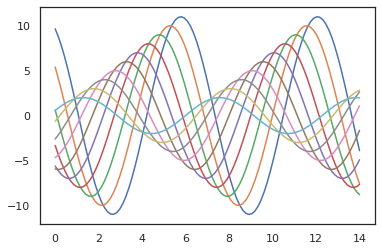

In [50]:
sns.set(style = "white")
cosplot()

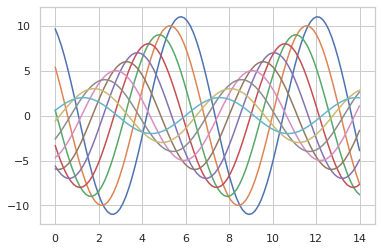

In [51]:
sns.set(style = "whitegrid")
cosplot()

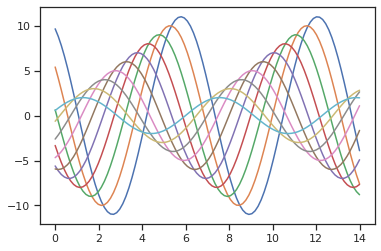

In [52]:
sns.set(style = "ticks")
cosplot()

# 과제4
- 공유드린 재무제표 데이터를 시각화로 표현해 주세요.
- 가설을 설정, 분석 목적을 정하고 시각화를 진행해서 나온 결과를 해석하는 글과 함께 코드를 작성해 주세요.

In [53]:
file_url = "https://drive.google.com/file/d/15w2Q3AR3mnlTpMDV-36FGxsgkaMJxtBi/view?usp=share_link" #구글드라이브 csv파일 이미지 주소
file_path='https://drive.google.com/uc?id=' + file_url.split('/')[-2] #'/'로 구분했을 때 url_path의 뒤에서 두번째 값이 공유된 파일의 고유값

print("공유파일 링크변환 경로명 : ", file_path)
fin_stat = pd.read_csv(file_path, encoding  = 'CP949') #파일 불러오기

공유파일 링크변환 경로명 :  https://drive.google.com/uc?id=15w2Q3AR3mnlTpMDV-36FGxsgkaMJxtBi


In [54]:
fin_stat

,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율
0,2016,9.776068e+10,23419492827,7.434119e+10,9.499312e+10,2379822965,480426339,76.044057
1,2017,1.043490e+11,23398872100,8.095035e+10,1.207350e+11,6987071352,7797097354,77.576381
2,2018,1.255730e+11,24027374437,1.015450e+11,1.633750e+11,6412992156,4153603488,80.865781
3,2019,1.361390e+11,34941404675,1.011980e+11,1.915460e+11,3664066464,3181392223,74.334031
4,2020,1.446900e+11,35459747467,1.092300e+11,2.662270e+11,7227983716,6501208590,75.492644


1. 부채비율 
- 부채비율이 높다는 것은 기업이 사업을 위해 투자한 돈보다 빌린 돈이 더 많다는 것
- 만약 기업의 부채 비율이 높다면 사업이 어려워졌을 때 상환해야 하는 부채가 많아 파산의 위험성이 존재한다.
- 업종별로 부채비율에 대한 판단기준은 다르지만 대체로 부채비율이 100%를 기준으로 100%보다 낮으면 건전한 편입니다.


In [55]:
%matplotlib inline

(74.33403127, 100.0)

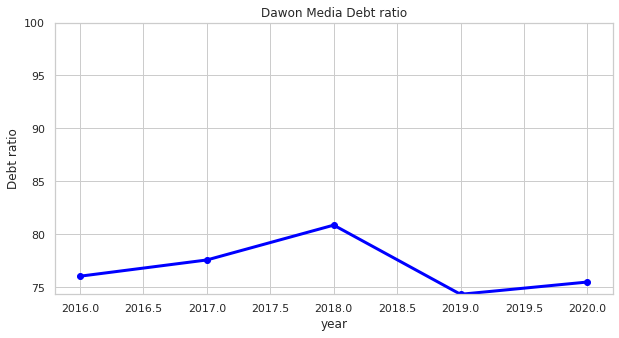

In [56]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 5))
plt.plot(fin_stat['연도'], fin_stat['부채비율'], marker = 'o', color = 'blue', linewidth = 3) # x축은 연도, y축은 부채비율로 설정하여 시간에 따른 변화를 관찰
plt.title('Dawon Media Debt ratio')
plt.xlabel('year')
plt.ylabel('Debt ratio')
plt.ylim(fin_stat['부채비율'].min(), 100)

- 부채비율의 변동이 크지 않은편이며, 100퍼센트에 훨씬 못미치는 수치이므로 꽤 건전한 운영을 하고 있는 회사임을 짐작할 수 있음

2. 자기자본이익율(ROE) = 당기순이익 / 자기자본

- 재무제표를 수익적 관점 수익성을 평가하는 재무비율은 방법이 다양하지만 그 중에서도 자기자본이익율(ROE)가 많이 사용
- 투자한 돈을 얼마나 효율적으로 사용하여 수익을 냈는지 알 수 있는 비율 (= 투자대비 수익률)

In [57]:
fin_stat['자기자본'] = fin_stat['자본총계'] - fin_stat['부채총계'] # 자기자본 컬럼을 새로 생성

In [58]:
fin_stat['ROE'] = fin_stat['당기순이익'] / fin_stat['자기자본'] # ROE 컬럼을 새로 생성

Text(0, 0.5, 'ROE')

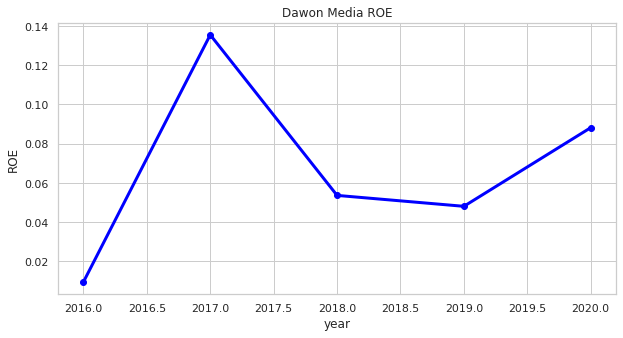

In [59]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 5))
plt.plot(fin_stat['연도'], fin_stat['ROE'], marker = 'o', color = 'blue', linewidth = 3) # x축은 연도, y축은 ROE으로 설정하여 시간에 따른 변화를 관찰
plt.title('Dawon Media ROE')
plt.xlabel('year')
plt.ylabel('ROE')

- 2017년 peak를 찍고 2018년 감소하였다고 다시 회복세로 전환된 것으로 보아 투자한 돈을 이용하여 충분히 효율적으로 수익을 낼 수 있을 것이라고 생각

3. 매출순이익율 = 당기순이익 / 매출액

- 회사에서 벌어들인 수익 중 몇% 정도가 이익으로 연결되었는지 알아보는 재무 비율

In [60]:
fin_stat['매출순이익율'] = fin_stat['당기순이익'] / fin_stat['매출액'] # 매출순이익율 컬럼을 새로 생성

Text(0, 0.5, 'ROS')

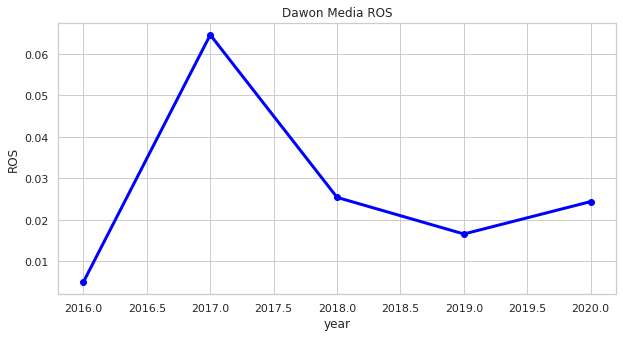

In [61]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 5))
plt.plot(fin_stat['연도'], fin_stat['매출순이익율'], marker = 'o', color = 'blue', linewidth = 3) # x축은 연도, y축은 매출순이익율으로 설정하여 시간에 따른 변화를 관찰
plt.title('Dawon Media ROS')
plt.xlabel('year')
plt.ylabel('ROS')

- 2017년에 정점을 찍고 다시 감소하는 추세였지만 2020년 다시 소폭증가하는 것으로 보아 매출에 대한 순이익율이 다시 회복세로 전환된 것으로 보임

4. 매출액
- 성장성 관점에서 회사가 성장하고 있는지를 확인하려면 단순히 회사의 매출액 추이만 살피는 것만으로 도움됨

Text(0, 0.5, 'sales')

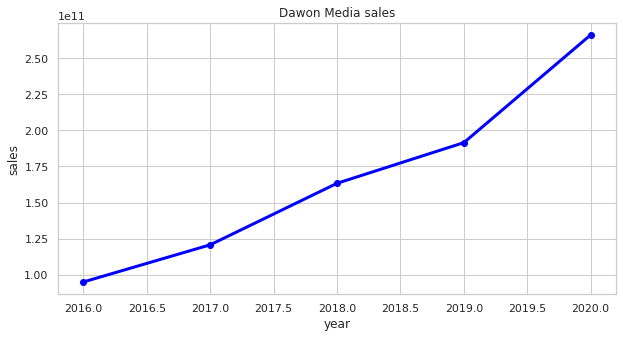

In [62]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 5))
plt.plot(fin_stat['연도'], fin_stat['매출액'], marker = 'o', color = 'blue', linewidth = 3) # x축은 연도, y축은 매출액으로 설정하여 시간에 따른 변화를 관찰
plt.title('Dawon Media sales')
plt.xlabel('year')
plt.ylabel('sales')

- 시간에 따른 매출액이 증가하는 것으로 보아 회사의 성장가능성이 높음을 알 수 있음